In [34]:
import pfTent as tent
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


In [92]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'

In [3]:
duration = 500
meroz = 0.01
timeToPeak = 10
maxParasitemia = 5
pgone = -3
n = 10
delta = 1

In [4]:
def growth_rate(p1,p2,k,t1,t2):
    delta_t = t2-t1
    delta_p = p2-p1
    r = (delta_p*k)/(delta_t*p1*(k-p1))
    return r

In [5]:
def get_growth_rate(parasitemia, K,delta):
    rates = []
    length = len(parasitemia)
    for i in np.arange(delta,length,delta):
        p2 = 10**parasitemia[i]
        p1 = 10**parasitemia[i-delta]
        t2 = i
        t1 = i-delta
        k = 10**K
        rate = growth_rate(p1,p2,k,t1,t2)
        rates.append(rate)
    return rates
        


In [101]:
def get_values(immunity=0):
    p = {}
    r = {}
    for i in np.arange(n):
        params = tent.get_infection_params(duration, meroz, timeToPeak, maxParasitemia)
        p[i] = tent.get_parasitemia(params,pgone)
        r[i] = get_growth_rate(p[i], 6,delta)
    return p, r

In [111]:
def plot_growth_rate(parasitemias, rates, title):

    fig, ax = plt.subplots(nrows = 2, figsize=(8,8))
    axins0 = ax[0].inset_axes([0.13,0.2,0.22,0.35])
    axins1 = ax[1].inset_axes([0.4,0.4,0.5,0.5])
    for person in np.arange(n):
        time_p = list(np.arange(len(parasitemias[person])))
        time_r = list(np.arange(delta,len(parasitemias[person]),delta))
        ax[0].plot(time_p, parasitemias[person], linewidth=1.5)
        ax[1].plot(time_r,rates[person],linewidth=1.5)
        axins1.plot(time_r,rates[person],linewidth=1.5)
        axins0.plot(time_p,parasitemias[person],linewidth=1.5)

    ax[0].set_xlabel('Days')
    ax[1].set_xlabel('Days')
    ax[0].set_ylabel('Log10 parasite density')
    ax[1].set_ylabel('Growth rate')
    axins1.set_xlim(0,25)
    axins0.set_xlim(0,25)
    axins0.set_ylim(4,5.5)
    fig.suptitle(title,size=20)
    fig.tight_layout()
    fig.savefig("figs/r_noImmunity.pdf")

In [112]:
p,r = get_values()

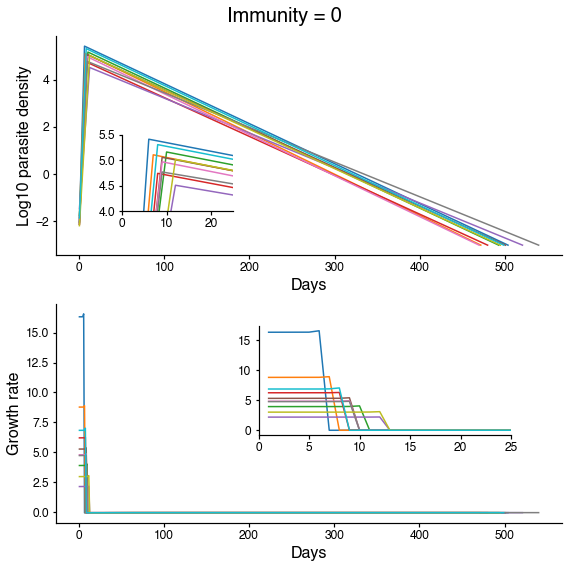

In [113]:
figure = plot_growth_rate(p,r,"Immunity = 0")